<a href="https://colab.research.google.com/github/EMcoding17/ExtraccionConocimientosDeBD/blob/main/Actividad08/EntrenamientoNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrenamiento No Supervisado**
# **Extraccion de conocimientos de base de datos**
## **Romero Sosa Emma Yuridia**
## **IDGS 91**

> ### **Problema**
Se tiene un conjunto de datos de erupciones de geiseres, y se desea clasificar para su estudio.
Los datos que se tienen son:
* **TimeEruption:** Tiempo de erupción en minutos.
* **TimeWaiting:** Timepo de espera para la siguiente erupción

# **Importar librerias**

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Verificar versiones
print(
    "Pandas: {} \nNumpy: {} \nMatplot: {} \nSKLearn: {}".format(
        pd.__version__, np.__version__, matplotlib.__version__, sklearn.__version__))

Pandas: 1.1.5 
Numpy: 1.19.5 
Matplot: 3.2.2 
SKLearn: 1.0.1


# **Cargar dataset**

In [3]:
!wget https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad08/geisers.csv
df = pd.read_csv('geisers.csv', delimiter=',', header='infer')

--2021-12-10 15:48:52--  https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad08/geisers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2278 (2.2K) [text/plain]
Saving to: ‘geisers.csv.5’

geisers.csv.5       100%[===================>]   2.22K  --.-KB/s    in 0s      

2021-12-10 15:48:52 (29.5 MB/s) - ‘geisers.csv.5’ saved [2278/2278]



In [4]:
#Mostrar forma del dataframe
df.shape

(272, 2)

In [5]:
#Mostrar los primeros 5 registros
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [6]:
#Mostrar los ultimos 5 registros
df.tail()

,TimeEruption,TimeWaiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


In [7]:
#Mostrar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


# **Limpieza de Datos**

In [8]:
#Obtener la suma de los datos faltantes de cada columna
df.isnull().sum()

TimeEruption    0
TimeWaiting     0
dtype: int64

# **Graficar Dataframe**

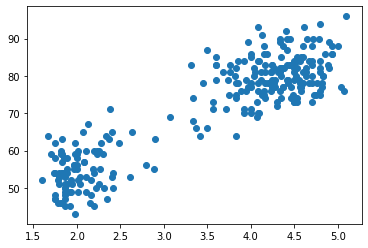

In [9]:
# Graficar los datos del dataframe para ver su distribución
plt.scatter(df['TimeEruption'], df['TimeWaiting'])
plt.show()

# **Configurar modelo**

In [10]:
model = KMeans(n_clusters=2, max_iter=100)

# **Estandarizar los datos**

In [11]:
#Antes de entrenar hay que estandarizar los datos
df = StandardScaler().fit_transform(df)

# **Graficar el dataframe estandarizado**

Como los datos se transformaron, para poder graficarlos debemos usar **[:,0]** para mostrar todos los datos de la primer columna y usar **[:,1]** para mostrar todos los datos de la segunda columna, ya que al hacer la estandarización, el dataframe se convirtió en un array.

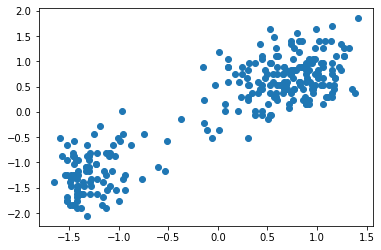

In [12]:
#Graficar dataframe estandarizado
plt.scatter(df[:,0], df[:,1])
plt.show()

# **Entrenamiento**

En este tipo de entrenamiento no se dividen los datos en training y test, ya que no se sabe cual sera el resultado.

In [13]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# **Centroides**

In [14]:
#Obtener las coordenadas de los conjuntos
centroids = model.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

# **Ver etiquetas**

In [15]:
#Mostrar las etiquetas para cada fila
#En este caso solo se muestra 0 y 1 por que existen solo 2 conjuntos
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

# **Graficar centroides**

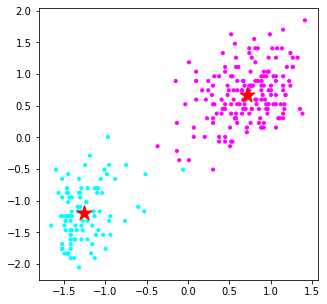

In [16]:
#Asignar tamaño del grafico
plt.figure(figsize=(5,5))
#Asignar un grafico tipo sctter basado en el modelo y sus cluster.
plt.scatter(df[:,0], df[:,1], c=model.labels_.astype(float), s=10, label='Clusters', cmap="cool")
#Asignar los centros o centroides de cada cluster
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=250, label='Centroids')
#Mostrar graficos
plt.show()

# **Predicciones**

In [17]:
#Funcion para crear predicciones
def new_Predict(col0, col1):
  new_label = model.predict([[col0,col1]])
  return new_label[0]

In [18]:
new_Predict(0.5,-1.5)

0

In [19]:
new_Predict(1.5,-1.5)

1

In [20]:
new_Predict(0,0)

1

In [21]:
new_Predict(-1,0)

0

# **Tecnica del codo**

Generar un rango de pruebas para graficar y observar cuando se aplane la curva, para seleccionar el numero de clusters.

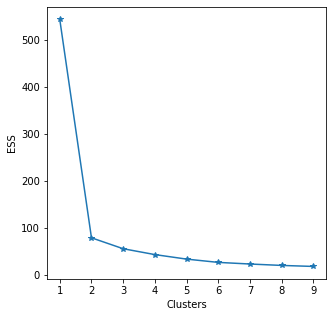

In [22]:
#Suma de la distancia al cuadrado
ess = []
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

#Graficar la suma de la distancia al cuadrado
plt.figure(figsize=(5,5))
plt.plot(list_k,ess,'-*')
plt.xlabel('Clusters')
plt.ylabel('ESS')
plt.show()

# **Graficar con distintos clusters**

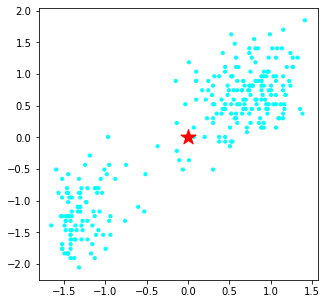

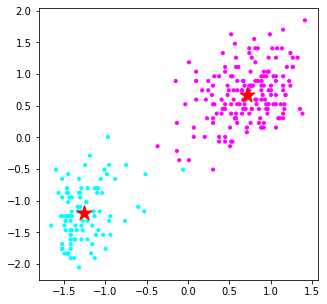

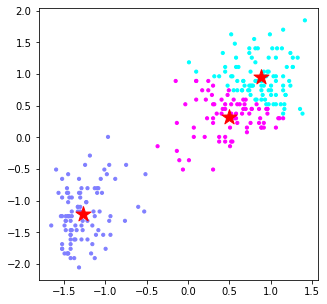

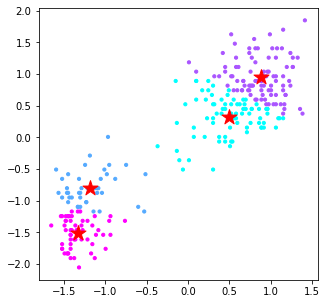

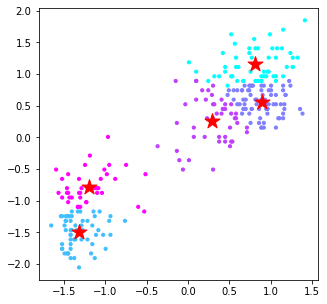

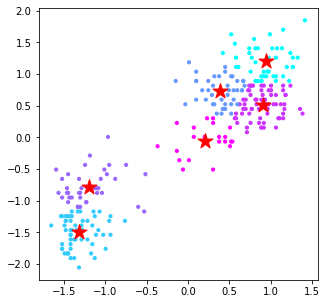

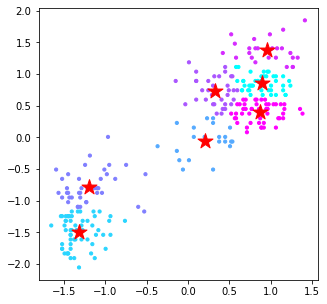

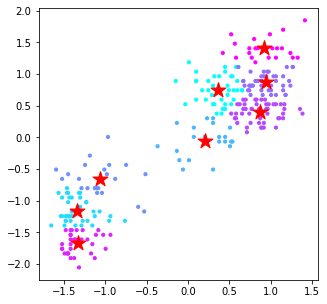

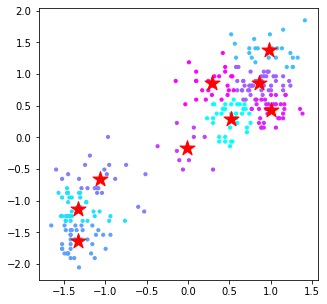

In [23]:
list_k = list(range(1,10))

for k in list_k:
  #Suma de las distancias al cuadrado
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)
  #Obtener las coordenadas de los conjuntos
  centroids = model.cluster_centers_
  #Asignar tamaño del grafico
  plt.figure(figsize=(5,5))
  #Asignar un grafico tipo sctter basado en el modelo y sus cluster.
  plt.scatter(df[:,0], df[:,1], c=model.labels_.astype(float), s=10, label='Clusters', cmap="cool")
  #Asignar los centros o centroides de cada cluster
  plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=250, label='Centroids')
  #Mostrar graficos
  plt.show()